# Import Libraries

In [114]:
import pandas as pd
import numpy as np

from collections import Counter

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import f1_score, confusion_matrix, ConfusionMatrixDisplay

from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# Main

In [117]:
df = pd.read_csv('Machine Downtime.csv')
df = df.sort_values(by=["Machine_ID"])
df.head()

,Date,Machine_ID,Assembly_Line_No,Hydraulic_Pressure(bar),Coolant_Pressure(bar),Air_System_Pressure(bar),Coolant_Temperature,Hydraulic_Oil_Temperature(°C),Spindle_Bearing_Temperature(°C),Spindle_Vibration(µm),Tool_Vibration(µm),Spindle_Speed(RPM),Voltage(volts),Torque(Nm),Cutting(kN),Downtime
0,31-12-2021,Makino-L1-Unit1-2013,Shopfloor-L1,71.040000,6.933725,6.284965,25.6,46.0,33.4,1.291,26.492,25892.0,335.0,24.055326,3.58,Machine_Failure
1768,09-04-2022,Makino-L1-Unit1-2013,Shopfloor-L1,98.365141,5.212009,6.195906,4.5,45.6,29.2,0.861,10.198,20951.0,326.0,22.786597,3.08,No_Machine_Failure
1764,09-04-2022,Makino-L1-Unit1-2013,Shopfloor-L1,98.700000,6.560332,5.916997,10.4,49.8,36.2,0.707,18.277,23432.0,334.0,25.973993,3.49,Machine_Failure
760,21-03-2022,Makino-L1-Unit1-2013,Shopfloor-L1,139.919054,3.126011,6.553482,29.8,48.3,38.8,0.974,30.120,24097.0,269.0,19.811678,3.13,No_Machine_Failure
761,21-03-2022,Makino-L1-Unit1-2013,Shopfloor-L1,81.138221,6.026284,6.916235,10.6,51.9,31.9,1.072,12.865,14266.0,322.0,31.620335,3.41,No_Machine_Failure


In [19]:
df.columns

Index(['Date', 'Machine_ID', 'Assembly_Line_No', 'Hydraulic_Pressure(bar)',
       'Coolant_Pressure(bar)', 'Air_System_Pressure(bar)',
       'Coolant_Temperature', 'Hydraulic_Oil_Temperature(°C)',
       'Spindle_Bearing_Temperature(°C)', 'Spindle_Vibration(µm)',
       'Tool_Vibration(µm)', 'Spindle_Speed(RPM)', 'Voltage(volts)',
       'Torque(Nm)', 'Cutting(kN)', 'Downtime'],
      dtype='object')

In [118]:
Counter(df['Downtime'])

Counter({'Machine_Failure': 1265, 'No_Machine_Failure': 1235})

In [119]:
# There are 1 to 99 machine, split dataset into train/test via the machine ID
list(set(df['Machine_ID'].tolist()))

['Makino-L2-Unit1-2015', 'Makino-L1-Unit1-2013', 'Makino-L3-Unit1-2015']

# Split Data (Train/Test)

In [144]:
### Split by machine
train_df = df[df["Machine_ID"]!='Makino-L3-Unit1-2015']
test_df  = df[df["Machine_ID"]=='Makino-L3-Unit1-2015']

target_col = "Downtime"
columns=[target_col, 
         'Date', 
         "Machine_ID", 
         'Assembly_Line_No', 

        'Hydraulic_Pressure(bar)',
        'Coolant_Pressure(bar)',
        # 'Air_System_Pressure(bar)',
        # 'Coolant_Temperature',
        # 'Hydraulic_Oil_Temperature(°C)',
        # 'Spindle_Bearing_Temperature(°C)', 
        # 'Spindle_Vibration(µm)',
        # 'Tool_Vibration(µm)', 
        'Spindle_Speed(RPM)',
        # 'Voltage(volts)',
        'Torque(Nm)', 
        'Cutting(kN)',

         ]


X_train = train_df.drop(columns=columns)
y_train = train_df[target_col]

X_test = test_df.drop(columns=columns)
y_test = test_df[target_col]

le = LabelEncoder()

y_train = le.fit_transform(y_train)
y_test  = le.transform(y_test)

In [145]:
### Split randomly
# target_col = "Downtime"
# columns = [
#     target_col, 
#     'Date',
#     "Machine_ID", 
#     ]

# X = df.drop(columns=columns, errors="ignore")
# y = df[target_col]

# X_train, X_test, y_train, y_test = train_test_split(
#     X, y,
#     test_size=0.2,
#     random_state=42,
#     stratify=y   # IMPORTANT for 3-class
# )

# le = LabelEncoder()

# y_train = le.fit_transform(y_train)
# y_test  = le.transform(y_test)

In [146]:
X_train

,Air_System_Pressure(bar),Coolant_Temperature,Hydraulic_Oil_Temperature(°C),Spindle_Bearing_Temperature(°C),Spindle_Vibration(µm),Tool_Vibration(µm),Voltage(volts)
0,6.284965,25.6,46.0,33.4,1.291,26.492,335.0
1768,6.195906,4.5,45.6,29.2,0.861,10.198,326.0
1764,5.916997,10.4,49.8,36.2,0.707,18.277,334.0
760,6.553482,29.8,48.3,38.8,0.974,30.120,269.0
761,6.916235,10.6,51.9,31.9,1.072,12.865,322.0
...,...,...,...,...,...,...,...
117,6.474158,31.2,44.4,30.5,1.743,33.729,333.0
1135,7.712441,21.1,49.4,26.5,1.118,26.676,372.0
1136,6.559292,21.6,44.7,37.4,0.963,28.759,366.0
329,6.130047,27.0,51.6,34.0,1.109,33.583,382.0


In [147]:
cat_cols = []
num_cols = [c for c in X_train.columns if c not in cat_cols]

In [148]:
preprocess = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), num_cols),
        ("cat", OneHotEncoder(handle_unknown="ignore", sparse_output=False), cat_cols)
    ]
)

# model = Pipeline([
#     ("prep", preprocess),
#     ("clf", RandomForestClassifier(
#         n_estimators=300,
#         random_state=42,
#         class_weight="balanced"
#     ))
# ])

model = Pipeline([
    ("prep", preprocess),
    ("clf", XGBClassifier(
        objective="multi:softmax",
        num_class=3,
        n_estimators=300,
        max_depth=6,
        learning_rate=0.05,
        subsample=0.8,
        colsample_bytree=0.8,
        eval_metric="mlogloss",
        random_state=42
    ))
])

In [149]:
model.fit(X_train, y_train)

,steps,"[('prep', ...), ('clf', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [150]:
y_pred = model.predict(X_test)

In [151]:
f1_macro = f1_score(y_test, y_pred, average="macro")
f1_micro = f1_score(y_test, y_pred, average="micro")
f1_weighted = f1_score(y_test, y_pred, average="weighted")

print("F1 macro   :", f1_macro)
print("F1 micro   :", f1_micro)
print("F1 weighted:", f1_weighted)

F1 macro   : 0.8410605924730219
F1 micro   : 0.8410757946210269
F1 weighted: 0.8410833956950294


In [152]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[348  67]
 [ 63 340]]


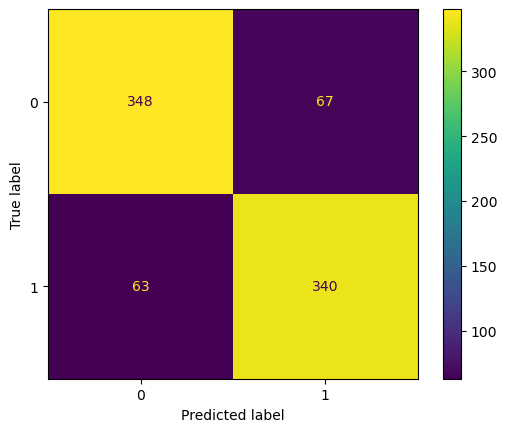

In [153]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

In [154]:
prep = model.named_steps["prep"]
num_features = num_cols
feature_names = X_train.columns.to_list()

xgb_model = model.named_steps["clf"]
importances = xgb_model.feature_importances_

fi = (
    pd.DataFrame({
        "feature": feature_names,
        "importance": importances
    })
    .sort_values("importance", ascending=False)
)

fi.head(20)

,feature,importance
1,Coolant_Temperature,0.415572
6,Voltage(volts),0.103303
3,Spindle_Bearing_Temperature(°C),0.098124
2,Hydraulic_Oil_Temperature(°C),0.097413
5,Tool_Vibration(µm),0.096794
0,Air_System_Pressure(bar),0.095944
4,Spindle_Vibration(µm),0.092849
